![Astrofisica Computacional](../../../logo.png)

---
## 01. Logistic Regression with SciKit-Learn


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet, we will use the `scikit-learn` package to make a logistic regression to obtain the class of an astrophysical object using photometric data from the SDSS.

---

---

## Classification of Astronomical Objects

As an example of the **Logistic Regression** we wil consider a data set of astronomical objects from the SDSS database (DR17). It includes 100000 objects with  18 features. This dataset was obtained from [this page](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import plot_confusion_matrix, confusion_matrix

original_data = pd.read_csv("object_classification.csv")
original_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


The feature `'class'` gives the typo of object; 'STAR', 'GALAXY' or 'QSO'. For this example we will consider only the types 'STAR' and 'GALAXY' and therefore, we will define a new dataframe including samples of these types and the following features:

In [2]:
df = original_data[['u','g','r','i','z','redshift','class']][original_data['class']!='QSO']
df

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


Note that there are only 81039 samples in this new dataframe.

In [3]:
df.describe()

,u,g,r,i,z,redshift
count,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000,81039.000000
mean,22.081744,20.439013,19.416859,18.769851,18.294939,0.309225
std,35.282574,35.264528,1.921890,1.736933,35.230618,0.293630
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.235575,18.591925,17.725910,17.327350,17.062600,0.000311
50%,22.491240,21.122060,19.806690,19.056510,18.660530,0.247622
75%,23.954780,22.264185,20.886895,19.963560,19.513655,0.542509
max,30.660390,31.602240,29.571860,30.250090,29.383740,1.995524


The idea of this exercise is to train a Logistic Regression algorithm that gives the `'class'` of an object (classifies the sample) using the features `'u'`, `'g'`, `'r'`, `'i'`, `'z'`, `'redshift'`. First, lets verify the behavior of some variables graphically,

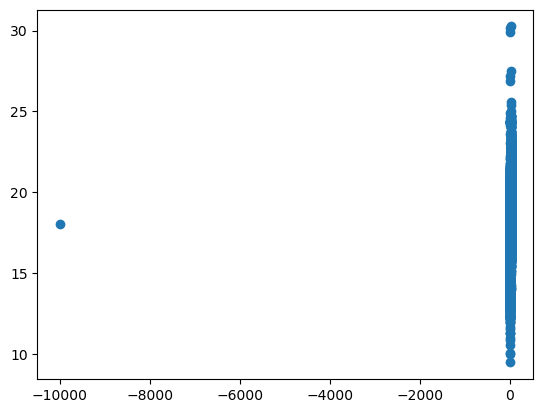

In [4]:
plt.figure()
plt.scatter(df['u'], df['i'])
plt.show()

Note that in many of the plots it is possible to identify an outlier! Hence, we need to get rid of it. First, we identify the sample,

In [5]:
outlier = df.query('u < 0 or g < 0 or r < 0 or i < 0 or z < 0')
outlier

,u,g,r,i,z,redshift,class
79543,-9999.0,-9999.0,18.1656,18.01675,-9999.0,0.000089,STAR


Now, we drop this item,

In [6]:
df = df.drop(79543)
df

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY


We will make a plot of some of the features, showing the `'class'` of each sample with a color code. Then, lets introduce a new column defining the color for 'STAR' and 'GALAXY',

In [7]:
df['classColor'] = df['class'].replace(['STAR', 'GALAXY'],['crimson', 'cornflowerblue'])
df

,u,g,r,i,z,redshift,class,classColor
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY,cornflowerblue
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY,cornflowerblue
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY,cornflowerblue
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY,cornflowerblue
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY,cornflowerblue
...,...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,GALAXY,cornflowerblue
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,GALAXY,cornflowerblue
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,GALAXY,cornflowerblue
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,GALAXY,cornflowerblue


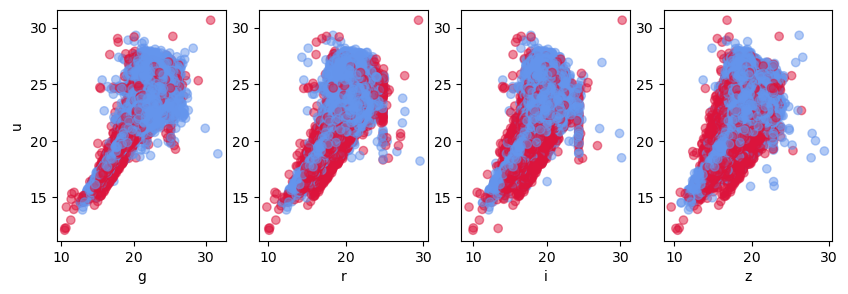

In [8]:
fig, ax = plt.subplots(1,4, figsize=(10,3))
ax[0].scatter(df['g'], df['u'], c=df['classColor'], alpha=0.5)
ax[0].set_ylabel(r'u')
ax[0].set_xlabel(r'g')
ax[1].scatter(df['r'], df['u'], c=df['classColor'], alpha=0.5)
ax[1].set_xlabel(r'r')
ax[2].scatter(df['i'], df['u'], c=df['classColor'], alpha=0.5)
ax[2].set_xlabel(r'i')
ax[3].scatter(df['z'], df['u'], c=df['classColor'], alpha=0.5)
ax[3].set_xlabel(r'z')
plt.show()

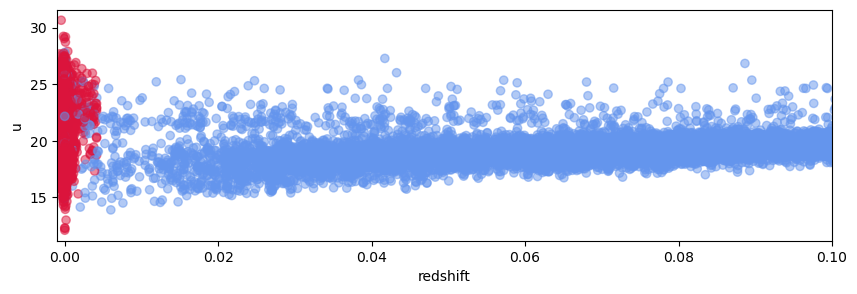

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.scatter(df['redshift'], df['u'], c=df['classColor'], alpha=0.5)
ax.set_ylabel(r'u')
ax.set_xlabel(r'redshift')
ax.set_xlim(-0.001, 0.1)
plt.show()

It is clear that it is not an easy task to classify the samples according to the `'class'` feature using the band information. However, we will try to train a **Logistic Regression** algorithm using this information. The first step is to define the dependent and independent variables,

In [23]:
Xdf = df[['u','g','r','i','z','redshift']]
ydf = df[['class']]

In [24]:
ydf

,class
0,GALAXY
1,GALAXY
2,GALAXY
3,GALAXY
4,GALAXY
...,...
99995,GALAXY
99996,GALAXY
99997,GALAXY
99998,GALAXY


Now, we will split these sets into train and test subsets,

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf, random_state=413, test_size=0.2)
X_train.shape, y_train.shape

((64830, 6), (64830, 1))

In [26]:
y_train

,class
75259,GALAXY
74059,GALAXY
69652,STAR
84461,STAR
16129,STAR
...,...
51857,GALAXY
25157,GALAXY
8625,GALAXY
88360,STAR


### The Logistic Regressor

This time, we will use the function [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

#### The Solver

The `LogisticRegressio` class includes multiple solvers, which are algorithm to use in the optimization problem to find the solution of the gradient (equals zero) problem. In general, the solver is used to find the root of the set of equations given by the gradient of the cost function. Hence, it is possible to use methods such as Newton-Raphson's. 

The default solver in the`LogisticRegression` is called ‘lbfgs’. However, we will chose the ‘liblinear’ solver, which is recommended for small datasets. For large datasets, the recommended solvers are ‘sag’ and ‘saga’ (See documentation for details).

In [15]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

print("Validation score:", model.score(X_test, y_test))

print("Validation score:", model.score(X_train, y_train))

/Users/eduard/miniforge3/envs/ashcat/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation score: 0.8218163869693978
Validation score: 0.8224587382384698


The warning appearing above is due to the object type or the shape of the arguments in the `.fit()` method. One way to prevent the warning is to transform the dataframe into a numpy array and reshape it,

In [27]:
y_train_new = y_train.to_numpy()
y_train_new = y_train_new.reshape(64830)

In [28]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train_new)

print("Validation score:", lr.score(X_test, y_test))

Validation score: 0.9843904244817374


As noted above, the validation score for the Logistic Regression model is very high (rememeber that a score of 1 gives a perfect model!).

Another way to illustrate the score of the model is using the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [30]:
cm = confusion_matrix(y_test, lr.predict(X_test), normalize='all')
cm

array([[0.71933613, 0.01560958],
       [0.        , 0.26505429]])

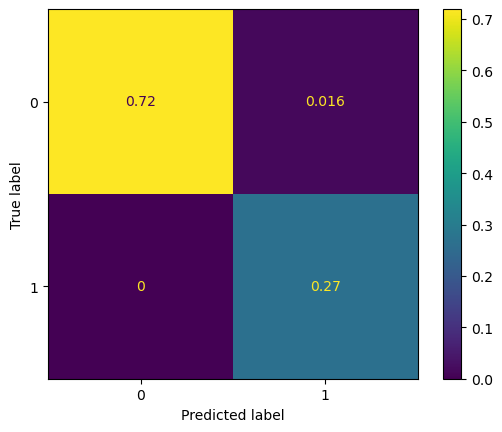

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()